# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Importing-shared-tools" data-toc-modified-id="Importing-shared-tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing shared tools</a></div><div class="lev1 toc-item"><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></div><div class="lev2 toc-item"><a href="#General-(basic)-plots" data-toc-modified-id="General-(basic)-plots-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General (basic) plots</a></div><div class="lev2 toc-item"><a href="#Plots-per-query" data-toc-modified-id="Plots-per-query-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plots per query</a></div><div class="lev2 toc-item"><a href="#Model-plots" data-toc-modified-id="Model-plots-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model plots</a></div><div class="lev2 toc-item"><a href="#Animation-plots" data-toc-modified-id="Animation-plots-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Animation plots</a></div><div class="lev3 toc-item"><a href="#Perf.-metric-distribution-animation" data-toc-modified-id="Perf.-metric-distribution-animation-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Perf. metric distribution animation</a></div><div class="lev3 toc-item"><a href="#Performance-plots" data-toc-modified-id="Performance-plots-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Performance plots</a></div><div class="lev1 toc-item"><a href="#Factory-Floor" data-toc-modified-id="Factory-Floor-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Factory Floor</a></div><div class="lev2 toc-item"><a href="#Analyse-results" data-toc-modified-id="Analyse-results-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analyse results</a></div><div class="lev2 toc-item"><a href="#Global-plots" data-toc-modified-id="Global-plots-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Global plots</a></div><div class="lev2 toc-item"><a href="#Performance-plots" data-toc-modified-id="Performance-plots-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Performance plots</a></div>

# Importing shared tools

In [1]:
# Start by import the exp package.

import sys
import os
import numpy as np
import seaborn as sns

src_folder = os.path.dirname(os.getcwd())       # Current file is in a subfolder 'ipynb' or 'core' of the src directory
main_folder = os.path.dirname(src_folder)       # Main folder of the experiment (= where everything runs)

py_pkg_folder = os.path.join(main_folder,'libs')
if py_pkg_folder not in sys.path: sys.path.append(py_pkg_folder)
    
from exp.tools.shared import *
from exp.analysis import *

from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import HTML

# Visualization

Here we collect everything related to visualizations.

## General (basic) plots

In [2]:
# Some exploratory and straighforward plots.

def plot_datasets(df,save='1'):
    """
    Dataset distribution
    """
    
    g = sns.lmplot(x="Nb Tuples", y="Nb Atts", hue="Dataset", size=8 ,data=df,fit_reg=False,scatter_kws={"s": 150})
    
    fname='figs/'+save+'_'+'datasets'+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_F1(df,group='System',save='1'):
    """
    Show the avg F1 per DataSet.
    """
    
    g = sns.factorplot(x="Dataset", y="F1/Query", hue=group, data=df, size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (F1-score/Target)/Query")
    
    fname='figs/'+save+'_'+'avg_F1_compare_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g



def plot_avg_mse(df,group='selection',save='1'):
    """
    Show the avg MSE per DataSet.
    """
    sns.set(font_scale = 1.3)
    # Palette from light-green to dark-green, you can leave as many colors as we need
    #my_palette = ['#e41a1c','#377eb8','#a1d99b','#74c476','#41ab5d','#238b45','#005a32']
    my_palette = ['#e41a1c','#a1d99b','#74c476','#41ab5d','#238b45','#005a32']
    sns.set_palette(my_palette)
    sns.set_style(style='whitegrid') 
    g = sns.factorplot(x="Dataset", y="Sum of squared residuals / query", hue=group, data=df, size=8, kind="bar", palette=my_palette)
    g.despine(left=True)
    
    g.set_ylabels("Average (MSE/Target)/Query")
    
    fname='figs/'+save+'_'+'avg_R2_compare_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g


def plot_avg_R2(df,group='selection',save='1'):
    """
    Show the avg F1 per DataSet.
    """
    
    g = sns.factorplot(x="Dataset", y="R^2 per query", hue=group, data=df, size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (R^2/Target)/Query")
    
    fname='figs/'+save+'_'+'avg_R2_compare_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_relative_error(df,group='selection',save='1'):
    """
    Show the avg F1 per DataSet.
    """
    
    g = sns.factorplot(x="Dataset", y="Relative error / query", hue=group, data=df, size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Relative error / Query")
    
    fname='figs/'+save+'_'+'relative_error_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_acc(df,group='System',save='1'):
    """
    Show the avg Acc/Query per DataSet.
    """
    
    g = sns.factorplot(x="Dataset", y="Acc/Query", hue=group, data=df, size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (Acc./Target)/Query")
    
    fname='figs/'+save+'_'+'avg_F1_compare_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_F1_pred(df,group='System',save='1'):
    """
    Show the avg F1 per prediction technique.
    """
    
    g = sns.factorplot(x="prediction", y="F1/Query", hue=group, data=df,
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (F1-score/Target)/Query")
    
    fname='figs/'+save+'_'+'avg_F1_pred_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_F1_query_param(df,group='System',save=''):
    """
    Show the avg F1 per query-parameter.
    
    E.g.: In the case of 'missing' queries this implies the ratio of missing attributes.
    """
    
    g = sns.factorplot(x="query_param", y="F1/Query", hue=group, data=df,
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    
    g.set_ylabels("Average (F1-score/Target)/Query")
    
    fname='avg_F1_pred_'+group+'.png'
    g.savefig(fname) if save != '' else None
    return g

def plot_avg_ind(df,group='System',save='1',log=False):
    """
    Show the avg induction time per Dataset
    """
    sns.set(font_scale = 1.3)
    # Palette from light-green to dark-green, you can leave as many colors as we need
    my_palette = ['#e41a1c','#a1d99b','#74c476','#41ab5d','#238b45','#005a32']    
    sns.set_palette(my_palette)
    sns.set_style(style='whitegrid') 
    
    g = sns.factorplot(x="Dataset", y="Ind t", hue=group, data=df,
                   size=8, kind="bar", palette=my_palette)
    g.despine(left=True)
    
    g.fig.get_axes()[0].set_yscale('log') if log == True else None
    g.set_ylabels("Average model induction time")
    
    logmessage = 'log' if log == True else ''
    fname='figs/'+save+'_'+'avg_ind_compare_'+group+'_'+logmessage+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_inf(df,group='System',save='1',log=False):
    """
    Show the total inference time per Dataset
    """
    
    sns.set(font_scale = 1.3)
    # Palette from light-green to dark-green, you can leave as many colors as we need
    my_palette = ['#e41a1c','#a1d99b','#74c476','#41ab5d','#238b45','#005a32']
    sns.set_palette(my_palette)
    sns.set_style(style='whitegrid') 
    
    g = sns.factorplot(x="Dataset", y="Inf t", hue=group, data=df,
                   size=8, kind="bar", palette=my_palette)
    g.despine(left=True)
    
    g.set_ylabels("Average model inference time")
    g.fig.get_axes()[0].set_yscale('log') if log == True else None
    
    logmessage = 'log' if log == True else ''
    fname='figs/'+save+'_'+'avg_inf_compare_'+group+'_'+logmessage+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_inf_query(df,group='System',save='',log=False):
    """
    Show the avg inf_t/query, per Dataset
    """
    
    g = sns.factorplot(x="Dataset", y="Mean time/Query", hue=group, data=df,
                   size=8, kind="bar", palette="muted")
    g.despine(left=True)
    
    
    g.set_ylabels("Average inference time/query")
    g.fig.get_axes()[0].set_yscale('log') if log == True else None
    
    logmessage = 'log' if log == True else ''
    fname='figs/'+save+'_'+'avg_inf_query_compare_'+group+'_'+logmessage+'.png'
    g.savefig(fname) if save != '' else None 
    return g

def plot_avg_F1_ensembles(df,save=''):
    """
    Show the avg F1 per ensemble technique.
    """
    
    g = sns.factorplot(x="ens_its", y="F1/Query", hue='Dataset', data=df,
                   size=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Average F1/Query vs Ens Iteration")
    fname='figs/'+save+'_'+'avg_f1_query_ensemble_its'+'.png'
    g.savefig(fname) if save != '' else None 
    return g

## Plots per query

In [3]:
# Plots that use data per query, i.e. focus on one experiment.

def per_targetset_plot(df,ys = ['F1'],yrange=[0,1]):
    plt.style.use('fivethirtyeight')

    
    x = df['ts_ID'].values
    
    fig, ax = plt.subplots()
    plt.xlim([0, len(x)]) 
    plt.ylim(yrange)
    
    for y in ys:
        y_quant = df[y].values
        ax.plot(x, y_quant,label=y)
    
    title="Quantity across targetsets"
    
    ax.set_title(title) 
    ax.legend(loc='lower right')
    plt.show()
    return 

def per_targetset_distr(df,ys = ['F1'],xrange=[0,1]):
    """
    Distrubution plotted with matplotlib, across all queries of a given experiment.
    """
    
    plt.style.use('fivethirtyeight')
    
    x = df['ts_ID'].values
    fig, ax = plt.subplots()
    #plt.xlim(xrange) 
    #plt.ylim([0,5])
    
    for y in ys:
        y_quant = df[y].values
        n, bins, patches = ax.hist(y_quant, 100,normed=0.5, alpha=0.75)
    
    title="Distribution across targetsets"
    
    ax.set_title(title) 
    plt.grid(True)
    plt.show()
    return 

def per_ts_distr(df, y ='F1', xrange=[0,1]):
    """
    Distribution plotted with seaborn.
    """
    
    sns.set(style="white", palette="muted", color_codes=True)
    sns.despine(left=True)
    
    f, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
    
    
    d = df[y]
    
    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0])
    
    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    return 

def make_hist_kde_plot(data,param,x_range=[0.0,1.0]):
    """
    Make a back-to-back histogram/kde plot
    
    :param data:    The data to plot, typically a performance measure, i.e. F1 or accuracy
    :param param:   The parameter that serves as time dimension of the animation, typically something like nb missing atts.
    :param x_range: No comment.
    """
    
    plt.clf()
    fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
    sns.set(style="white", palette="muted", color_codes=True)
    sns.despine(left=True)
    
    axes[0].set_xlim(x_range)
    axes[1].set_xlim(x_range)
    
    sns.distplot(data, kde=False, color="b", ax=axes[0])
    sns.distplot(data, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1])
    
    ratio=format(param, '.2f')

    fig.suptitle("Missing attributes ratio: "+ratio, fontsize=28)
    plt.setp(axes, yticks=[])
    plt.tight_layout()

    return fig, axes, x_range

## Model plots

In [4]:
def plot_model(ID, save='', data_loc=None):
    """
    Plot the schematic ensemble histograms
    """
    
    mf=read_manifest(ID)
    method=mf['induction']['ensemble'] if mf['induction']['basetype']=='Ensemble' else 'TDIDT'
    dataset=mf['dataset']
    
    desc, targ=get_mercs_model(ID, data_loc)
    
    desc_lens=[len(item) for item in desc]
    flat_desc, flat_targ = flatten_model(desc, targ)

    plt.clf()
    fig, axes = plt.subplots(1, 3, figsize=(14, 7), sharex=True)
    sns.set(style="white", palette="muted", color_codes=True)

    sns.distplot(flat_desc, kde=False, color="b", kde_kws={"shade": True}, ax=axes[0])
    sns.distplot(flat_targ, kde=False, color="r", kde_kws={"shade": True}, ax=axes[1])
    sns.distplot(desc_lens, kde=False, color="g", kde_kws={"shade": True}, ax=axes[2])
    
    axes[0].set_title("Descriptive attributes",size=16)
    axes[1].set_title("Target attributes",size=16)
    axes[2].set_title("Amount of desc. atts.",size=16)

    axes[0].grid(True)
    axes[1].grid(True)
    axes[2].grid(True)

    sns.despine(left=True)
    
    fig.suptitle('[ID: '+str(ID)+'] '+dataset+'-'+method , fontsize=28)
    
    fname='figs/'+save+'_model_summary_'+dataset+'_'+method+'.png'
    fig.savefig(fname) if save != '' else None 
    #plt.tight_layout()
    plt.show()
    return 

# Factory Floor

## Analyse results

In [5]:
## Perform analysis
# analyze_and_save_all(inputsfile = 'all_tests.csv', data_loc = '/cw/dtaijupiter/NoCsBack/dtai/evgeniya/mercs_python_correlation/data')
analyze_and_save_all(inputsfile = 'all_tests.csv')

0


ValueError: Length mismatch: Expected axis has 41 elements, new values have 36 elements

In [6]:
# Collect in DF
#df=get_exp_df_all(inputsfile = 'fi_kmeans_tests_exact.csv')
df=get_exp_df_all(inputsfile = 'fi_kmeans_tests_exact.csv')
df=calc_mean_time_query(df)
df.to_csv('fi_kmeans_comparison.csv')
df.head()

Dataset    Ind t    Inf t  Nb Atts  Nb Queries  Nb Tuples  R^2 per query  \
ID                                                                             
600   andro     77.1    125.5       36          36         48      -0.342987   
601     enb     96.7     56.1       10          10        767      -0.843036   
602    jura     92.7     85.3       18          18        358      -0.603486   
603   oes10    805.9   1726.6      314         314        402       0.037470   
604   oes97    622.5   1463.6      279         279        333       0.020977   
605     rf1   3143.5   2366.7       72          72       9004      -0.950920   
606   scm1d  20097.9  11864.8      296         296       9802      -0.300072   
607  scm20d   3565.0   1985.3       77          77       8965      -0.290013   
608   slump     69.9     39.0       10          10        102      -0.773509   
609      wq    192.0    209.3       30          30       1059      -1.235416   
610   andro    160.4    131.1       36          36         48      -1.355980   
611     enb    192.8     59.1       10          10        767      -0.537946   
612    jura    177.3     85.1       18          18        358      -0.281842   
613   oes10   1091.6   1785.9      314         314        402       0.041505   
614   oes97    869.1   1536.6      279         279        333       0.035689   
615     rf1   4919.5   2226.6       72          72       9004      -0.888439   
616   scm1d  29029.9  10104.4      296         296       9802      -1.017991   
617  scm20d   6353.3   1915.1       77          77       8965      -0.439997   
618   slump    129.9     30.1       10          10        102      -0.598048   
619      wq    358.3    176.7       30          30       1059      -0.818023   
620   andro    261.4    116.6       36          36         48      -1.608040   
621     enb    342.8     54.1       10          10        767      -0.448683   
622    jura    332.1     82.1       18          18        358      -0.359535   
623   oes10   1343.4   1911.6      314         314        402       0.039904   
624   oes97   1067.8   1569.1      279         279        333       0.024127   
625     rf1   6834.5   1868.1       72          72       9004      -0.987342   
626   scm1d  42644.4   9318.8      296         296       9802      -1.307833   
627  scm20d  10100.6   1814.3       77          77       8965      -1.003313   
628   slump    271.4     33.0       10          10        102      -0.603666   
629      wq    651.4    160.6       30          30       1059      -0.622814   

     Relative error / query  Sum of squared residuals / query       System  \
ID                                                                           
600                0.178318                          0.106753  mercspython   
601                0.240825                          0.202238  mercspython   
602                0.175319                          0.128305  mercspython   
603                0.037758                          0.009745  mercspython   
604                0.042967                          0.012131  mercspython   
605                0.139862                          0.089874  mercspython   
606                0.067861                          0.019174  mercspython   
607                0.111936                          0.042570  mercspython   
608                0.206866                          0.137955  mercspython   
609                0.114074                          0.068905  mercspython   
610                0.208467                          0.192162  mercspython   
611                0.206982                          0.159977  mercspython   
612                0.157910                          0.101357  mercspython   
613                0.037871                          0.009672  mercspython   
614                0.043115                          0.011959  mercspython   
615                0.136400                          0.086634  mercspython   
616                0.084090            

In [21]:
df = pd.read_csv('fi_comparison_exact.csv')
df.set_index('ID', inplace = True)

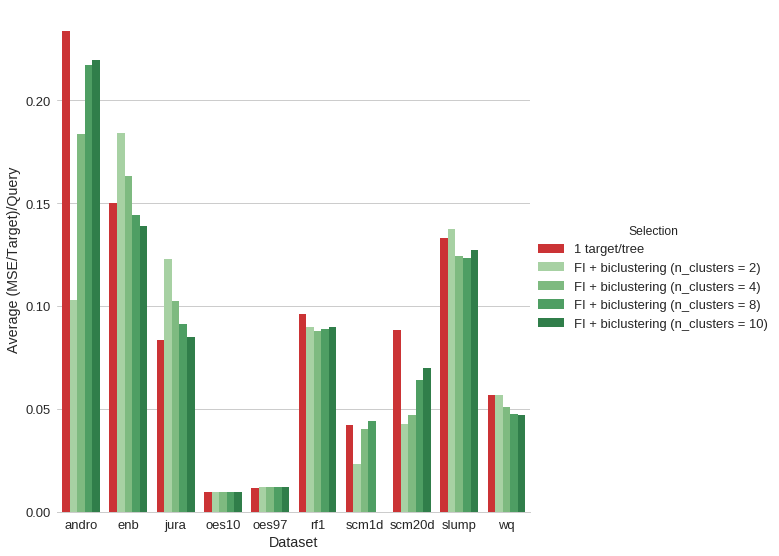

In [22]:
%matplotlib inline
plot_avg_mse(df,group='Selection')

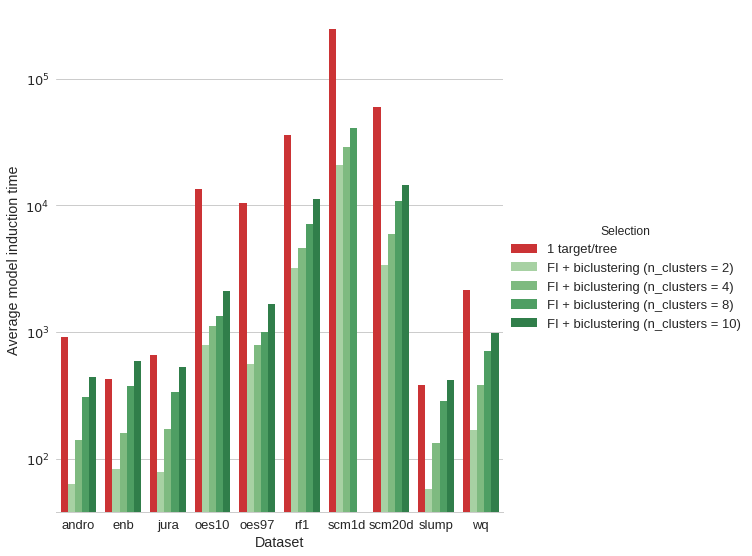

In [23]:
plot_avg_ind(df,group='Selection', log=True)

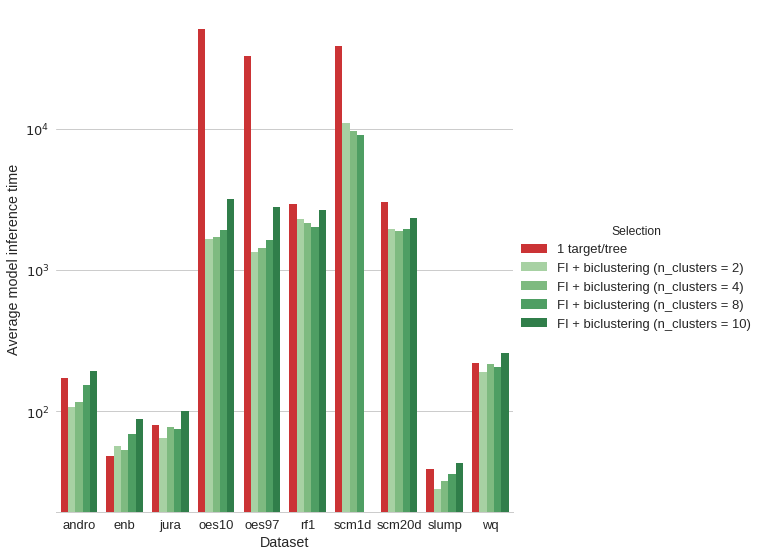

In [24]:
plot_avg_inf(df,group='Selection', log=True)

## Global plots

In [ ]:
plot_avg_ind(df,group='selection', log=True)

In [ ]:
plot_datasets(df,save='1')

In [ ]:
plot_avg_inf(df,group='selection', log=True)

In [ ]:
plot_relative_error(df, group = 'selection')

In [ ]:
plot_avg_ind(df_new,group='system',save='',log=True)
plt.show()

In [ ]:
plt.clf()
plot_avg_inf_query(df_new,group='system',save='pred_infs_query',log=True)
plt.show()

In [ ]:
plt.clf()
plot_avg_acc(df_new,group='system',save='')
plt.show()

In [ ]:
plot_avg_F1(df_new,group='system',save='')
plt.show()

## Performance plots

In [ ]:
for ID1 in range(1,12):
    ID2=ID1+11
    ID3=ID1+22
    ID4=ID1+88
    plot_predstrats_all(ID1, ID2, ID3,ID4, save='')

In [ ]:
for ID1 in range(1,12):
    ID2=ID1+22
    ID3=ID1+88
    plt_predstats_together(ID1,ID2,ID3,ys=['avg_macro_F1'],save='')

## Heatmaps

To plot performance measures on different queries.

In [ ]:
def collect_query_properties(ID):
    
    df=get_exp_df_single(ID)
    mf=read_manifest(ID)
    
    df['target']=np.array(mf['inference']['targetsets'])[:,0]
    
    nb_missing=[len(e) for e in mf['inference']['missingsets']]
    df['nb_miss']=nb_missing
    
    return df

def transform_query_properties(df, x='target', y='nb_miss', value='Acc'):
    """
    Transforming the queries to a 2D Matrix.
    
    The big problem is that most of the times, the x,y combination provides a unique value, but not always.
    So first we have to some tricks to deal with the case where x,y (e.g. (nb_miss, target_att)) 
    refers to different values.
    """
    
    df=df[[x,y,value]].reset_index()
    
    grouped=df.groupby([x, y]) # Groupby allows us to identify the problem cases swiftly
    df=grouped.mean().reset_index()
    
    df=df.pivot(index=x,columns=y,values=value)
    return df

def plot_heatmap(IDs, x='target', y='nb_miss', value='Acc'):
    
    # Collecting the data
    dfs=[None]*len(IDs)
    subheader=''
    for i,ID in enumerate(IDs):
        dfs[i]=collect_query_properties(ID)
        
        header = dfs[i].Dataset.values[0]+' - '+ value
        versus = ' vs. ' if i>0 else ''
        subheader = subheader + versus + dfs[i].System.values[0]+'/'+dfs[i].prediction.values[0]
        
        dfs[i]=transform_query_properties(dfs[i], x, y, value)
     
    dfs[0]=dfs[0].sort_values(dfs[0].columns[0])
    sort_indices=dfs[0].index.values
    
    if len(dfs)>1: dfs[1]=dfs[1].reindex(sort_indices)
    
    f, ax = plt.subplots(figsize=(9, 6))
    f.suptitle(header,fontsize=18)
    ax.set_title(subheader, fontsize=15,color='r')
    
    df_res = dfs[0].subtract(dfs[1]) if len(IDs) > 1 else dfs[0]
    sns.heatmap(df_res, annot=True, linewidths=.5, ax=ax)
    return


In [ ]:
for ID1 in range(1,12):

    ID2=ID1+88

    plot_heatmap([ID1,ID2], value='Acc')
plt.show()